# Training the Graph Neural Cellular Automata (GNCA) 

In [ ]:
import numpy as np
import torch
from environment import Environment
from custon_nca import CustomGNN
import matplotlib.pyplot as plt
import os

# Import the data

In [ ]:

positions = []

data = []

path = "../data/gastruloid/"

name = "moredecay"

for i in range(10):
    positions.append(np.load(path + f"{name}{i}_positions.npy"))
    SMAD_ERK = np.load(path + f"{name}{i}_SMAD_and_ERK.npy")
    BMP = np.load(path + f"{name}{i}_BMP_levels.npy")
    FGF = np.load(path + f"{name}{i}_FGF_levels.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)
    BMP_FGF = np.concatenate((BMP[:,:,None], FGF[:,:,None]), axis=2)

    d = BMP_FGF[:,:,:]

    # normalize the two channels independently
    d[:,:,0] = (d[:,:,0] - np.min(d[:,:,0])) / (np.max(d[:,:,0]) - np.min(d[:,:,0]))
    d[:,:,1] = (d[:,:,1] - np.min(d[:,:,1])) / (np.max(d[:,:,1]) - np.min(d[:,:,1]))
    data.append(d)
data = np.array(data)
print(data.shape)

# How does the data look?

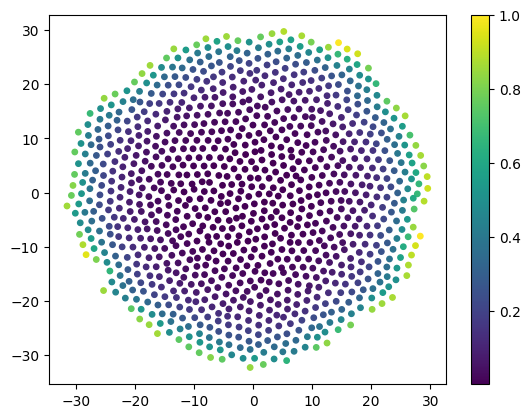

In [ ]:
iii = 0
plt.scatter(positions[iii][:,0], positions[iii][:,1], c=data[iii][-1,:,1], cmap='viridis', s=15)
plt.colorbar()

# We only want to look at some time points

In [ ]:
# usedata = np.moveaxis(np.array([data[:,5000,:,:], data[:,data.shape[1]//2,:,:], data[:,-1,:,:]]), 0,1)
# usedata = np.moveaxis(np.array([data[:,-1,:,:],]), 0,1)
usedata = np.moveaxis(np.array([data[:,0,:,:], data[:,-1,:,:],]), 0,1)
# usedata = np.moveaxis(np.array([data[:,1000,:,:], data[:,-1,:,:],]), 0,1)
print(usedata.shape)

(10, 2, 1000, 2)
